In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For upsampling of minority class
from sklearn.utils import resample

In [2]:
df = pd.read_csv('C:/Users/akshay/Desktop/UFT/Task/dataset.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

__As we can see in the above inforamtion that there are no null or missing values present in the dataset so the dataset is good inough to go in the next step.__

## Removing Outliers

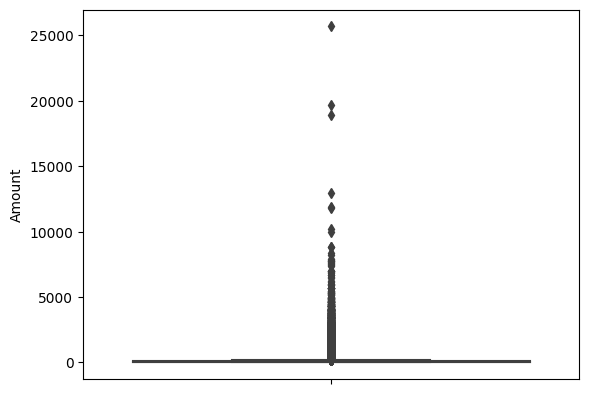

In [7]:
sns.boxplot(y=df['Amount'])
plt.show()

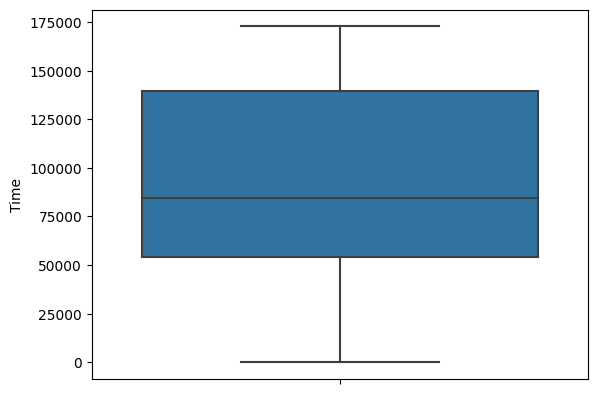

In [8]:
sns.boxplot(y=df['Time'])
plt.show()

As we can see in the above boxplot that there is no outlier present in the Time column, but in Amount column there are some __outlier present above 9000.__

So now we are going to remove that outliers 

In [9]:
df.loc[df['Amount']>=9000]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
46841,42951.0,-23.712839,-42.172688,-13.320825,9.925019,-13.945538,5.564891,15.710644,-2.844253,-1.580725,...,7.921600,-6.320710,-11.310338,0.404175,-4.547278,-1.577118,-2.357385,2.253662,12910.93,0
54018,46253.0,-21.780665,-38.305310,-12.122469,9.752791,-12.880794,4.256017,14.785051,-2.818253,-0.667338,...,7.437478,-5.619439,-10.547038,0.653249,-4.232409,-0.480459,-2.257913,2.082488,11898.09,0
58465,48401.0,-36.802320,-63.344698,-20.645794,16.715537,-20.672064,7.694002,24.956587,-4.730111,-2.687312,...,11.455313,-10.933144,-17.173665,1.180700,-7.025783,-2.534330,-3.602479,3.450224,19656.53,0
151296,95286.0,-34.549296,-60.464618,-21.340854,16.875344,-19.229075,6.335259,24.422716,-4.964566,0.188912,...,11.502580,-9.499423,-16.513186,0.744341,-7.081325,-2.604551,-3.550963,3.250802,18910.00,0
169457,119713.0,-20.924897,-37.943452,-14.060281,10.473005,-10.866639,6.256654,14.960521,-2.392155,-0.597076,...,6.829810,-6.926353,-9.928657,-0.447084,-4.848151,-2.241620,-2.140723,2.001492,11789.84,0
227921,145283.0,-21.532478,-34.704768,-8.303035,10.264175,3.957175,-3.229695,-4.066768,-4.083971,0.554072,...,5.198718,-7.331078,-32.828995,0.118986,-8.696627,-1.778061,-0.519786,2.716716,10000.00,0
274771,166198.0,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,...,-21.620120,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0
284249,172273.0,-9.030538,-11.112584,-16.233798,3.592021,-40.427726,23.917837,44.054461,-7.277778,-4.210637,...,-0.269048,0.988144,7.040028,0.347693,2.520869,2.342495,3.478175,-2.713136,10199.44,0


In [10]:
# New dataset without outliers 

df_new = df[df['Amount']<=9000]

## Handling Imbalanced Dataset 

In [11]:
df_new.value_counts('Class')

Class
0    284307
1       492
dtype: int64

As We can see inthe above cell that the dataset is imbalanced. the count os __0 = 284315__ and the count of __1 = 492__ only. 

Now we are going to use the resample technique to balance the dataset using upsampling technique.

In [12]:
df_minority = df_new[df_new['Class'] == 1]
df_majority = df_new[df_new['Class'] == 0]

In [13]:
df_minority_upsample = resample(df_minority,
                               replace=True,
                               n_samples=len(df_majority),
                               random_state=42)

In [14]:
df_minority_upsample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33276,37167.0,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,...,-0.734308,-0.599926,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593,12.31,1
239499,150138.0,-2.150855,2.187917,-3.430516,0.119476,-0.173210,0.290700,-2.808988,-2.679351,-0.556685,...,-0.073205,0.561496,-0.075034,-0.437619,0.353841,-0.521339,0.144465,0.026588,50.00,1
154720,102676.0,-5.552122,5.678134,-9.775528,8.416295,-4.409844,-1.506235,-6.899839,3.750443,-3.879793,...,1.128472,0.228484,0.286258,-0.536294,-0.104925,0.420919,-0.297557,-0.946184,119.74,1
142557,84789.0,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,...,0.325575,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594,354.33,1
41395,40662.0,-4.446847,-0.014793,-5.126307,6.945130,5.269255,-4.297177,-2.591242,0.342671,-3.880663,...,0.247913,-0.049586,-0.226017,-0.401236,0.856124,0.661272,0.492560,0.971834,1.00,1


In [15]:
df_minority_upsample.shape

(284307, 31)

In [16]:
df_upsampled = pd.concat([df_majority, df_minority_upsample])

In [17]:
df_upsampled['Class'].value_counts()

0    284307
1    284307
Name: Class, dtype: int64

#### So now we have the df_upsampled dataset which is balanced datset and we already removed the outliers and null values so the dataset is good to train the model. 

## Creating heatmap

<Axes: >

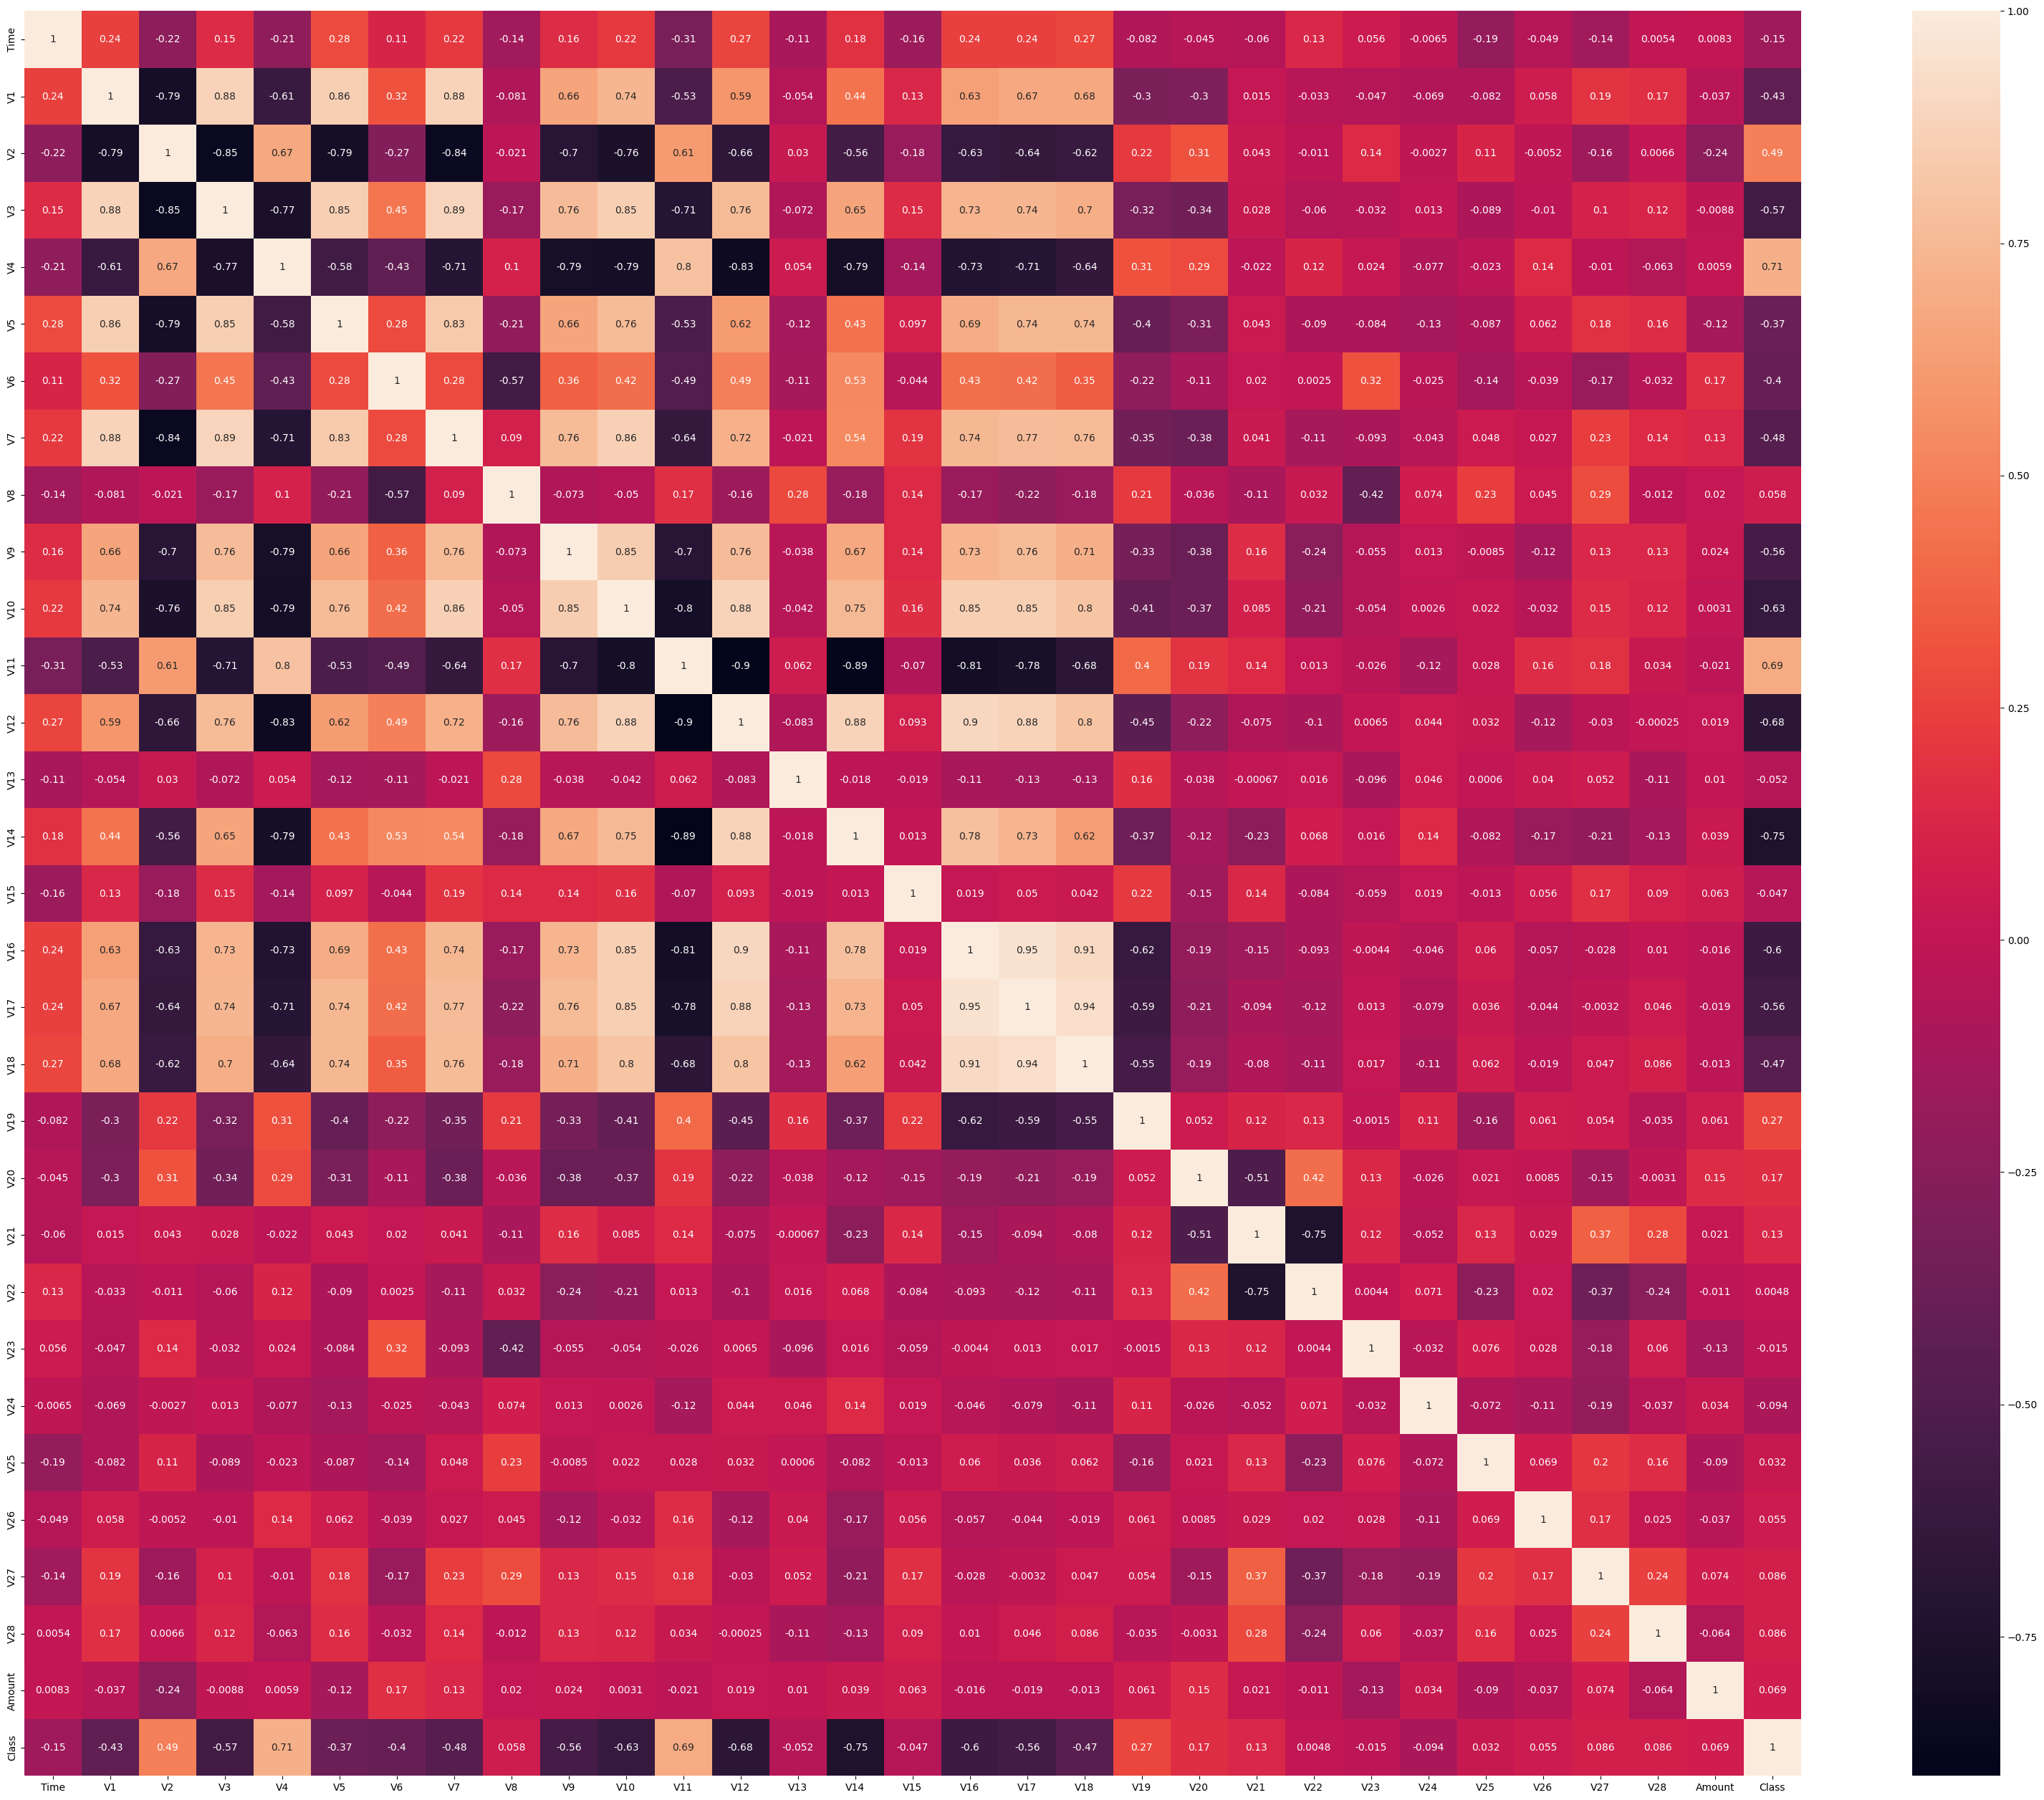

In [18]:
plt.figure(figsize=(40,32))
sns.heatmap(df_upsampled.corr(), fmt='.2g', annot=True)

In [19]:
df_upsampled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6641,8169.0,0.857321,4.093912,-7.423894,7.380245,0.973366,-2.730762,-1.496497,0.543015,-2.351190,...,0.375026,0.145400,0.240603,-0.234649,-1.004881,0.435832,0.618324,0.148469,1.00,1
204503,135314.0,-3.158990,1.765452,-3.390168,0.987410,-1.509930,-1.280952,-2.719557,0.718325,-1.660183,...,1.120533,1.605085,-0.618637,-0.251283,-0.240528,-0.004327,-0.235477,0.018129,84.28,1
215953,140293.0,0.951025,3.252926,-5.039105,4.632411,3.014501,-1.349570,0.980940,-1.819539,-2.099049,...,1.404524,-0.760549,0.358292,-1.185942,-1.286177,0.000365,0.169662,0.108276,0.77,1
30473,35942.0,-4.194074,4.382897,-5.118363,4.455230,-4.812621,-1.224645,-7.281328,3.332250,-3.679659,...,1.550473,0.614573,0.028521,0.013704,-0.149512,-0.131687,0.473934,0.473757,14.46,1


## Train Test Split

In [20]:
X = df_upsampled.drop('Class',axis=1)
y = df_upsampled['Class']

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.33,random_state=42)

## Model Training

In [22]:
# Model Evaluation 

from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

def evaluate_model(true, predicted):
    Accouracy = accuracy_score(true, predicted)
    Score_F1 = f1_score(true, predicted)
    Precision = precision_score(true,predicted)
    Recall = recall_score(true, predicted)
    
    return Accouracy,Score_F1,Precision,Recall

Here we are going to train multiple model. So that we can get to know that which model performs better so that we can use that model for further use.

So we are going to train the following models : 

    1.Logistic Regression
    2.SVM
    3.Naive Bayes
    4.KNN
    5.Decision Tree
    6.Random Forest

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    'Logistic Regression':LogisticRegression(),
    'Naive Bayes Classifier':GaussianNB(),
    'KNN Classifier':KNeighborsClassifier(n_neighbors=5),
    'Decision Tree Classsifier':DecisionTreeClassifier(),
    'Random Fores Classifier ':RandomForestClassifier(n_estimators=100)
}

In [24]:
trained_model_list = []
model_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    #Make Predictions
    y_pred = model.predict(X_test)
    
    Accouracy,Score_F1,Precision,Recall = evaluate_model(y_test, y_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model Training Performance')
    print('Accouracy: ',Accouracy)
    print('f1_score: ',Score_F1)
    print('Precision: ',Precision)
    print('Recall: ',Recall*100)
    
    
    print('='*35)
    print('\n')

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model Training Performance
Accouracy:  0.9457373842882495
f1_score:  0.944650409332565
Precision:  0.9644791759168813
Recall:  92.56205390433578


Naive Bayes Classifier
Model Training Performance
Accouracy:  0.8651375217833865
f1_score:  0.84584176027681
Precision:  0.9877500497965456
Recall:  73.95866624054544


KNN Classifier
Model Training Performance
Accouracy:  0.9988382193846826
f1_score:  0.9988401664201577
Precision:  0.9976830201513477
Recall:  100.0


Decision Tree Classsifier
Model Training Performance
Accouracy:  0.9997601829005078
f1_score:  0.9997603642463456
Precision:  0.9995208433157643
Recall:  100.0


Random Fores Classifier 
Model Training Performance
Accouracy:  0.9999467073112239
f1_score:  0.9999467376830892
Precision:  0.999893481039625
Recall:  100.0




# Fraud Detection Model Report


## Objective:
Build a machine learning model to effectively differentiate between fraudulent and non-fraudulent banking transactions. Achieve metrics of over 80% for accuracy, F1-score, and recall, considering the challenge of imbalanced data.

## Methodology:

__1. Data Understanding:__

    Used the INFO() method to get the idea about the dataset.
    Using DESCRIBE() method get the summary statistics for numerical feature including mean, std. dev., minimum, 25th percentile, 50th percentile, 75th percentile and maximum.


__2. Data Preprocessing:__

    Used Boxplot grapg to visually identify the outliers in features.
    

__3. Handling Imbalanced Data:__
    
    Recognized the imbalance in the target variable.
    Using Resample library solved the problem of imbalanced dataset 


__4. Model Selection:__
    
    Experimented with various machine learning models, including Logistic Regression, Naive Bayes, KNN Classifier, Decision Trees and Random Forests.

__5. Model Training:__

    Achieved optimal results with the Random Forest model.


__6. Evaluation Metrics:__

    To evaluate the model we have used the following metrics: Accuracy, F1-score, Precision and Recall.

## Results:

__Random Forest Model:__

    Accuracy: 99.99 %
    F1-score: 99.99 %
    Precision : 99.98 % 
    Recall: 100 %

### The Random Forest model, coupled with the minority upsampling technique from the 'Resample' library, we achieved metrics of 99.99% accuracy, 99.99% F1-score, 99.98% precision and 100% recall meet the specified criteria.